# Model Evaluation Exercise

## Regression evaluation

In [1]:
# import numpy
import numpy as np

In [2]:
from sklearn.datasets import make_regression

X,y = make_regression(n_features=10, n_samples=1000, noise=10)

print(X.shape)
print(y.shape)

(1000, 10)
(1000,)


In [3]:
from sklearn.linear_model import LinearRegression, Ridge

In [4]:
# creating linear regression
lr = LinearRegression()
lr.fit(X,y)
y_lr = lr.predict(X)

In [5]:
# creating ridge regression
rr = Ridge(alpha=0.1)
rr.fit(X,y)
y_rr = rr.predict(X)

_________________________
## Mean Absolute Error (MAE)


**Write the definition to the mean absolute error (MAE) below and how to interpret it?**
> *The MAE refers to taking the absolute of the difference between the actual and predicted target values, summing these differences, then dividing by the total number of samples. The value of MAE indicates the average distance of the predicted values from the true values. A smaller mean absolute error means the model is doing a good job at predicting target values.

* import **mean_absolute_error** from sklearn

In [6]:
from sklearn.metrics import mean_absolute_error

* compute MAE

In [7]:
# MAE for linear regression

MAE_lr = mean_absolute_error(y, y_lr)
MAE_lr

7.902284121888559

In [8]:
# MAE for ridge regression

MAE_rr = mean_absolute_error(y, y_rr)
MAE_rr

7.9025426654757345

* According to MAE, what is the better model?

In [44]:
if MAE_lr < MAE_rr:
    print('Linear regression is a better model.')
else:
    print('Ridge regression is a better model.')

Linear regression is a better model.


____________________________________
## R2 - Coefficient of Determination

**Write the definition to the R2 score below and how to interpret it?**
> *The R2 refers to the proportion of variation in the target that can be described by the dependent variables, beyond what the baseline model can explain. A higher R2 indicates that the model explains more of the variation.

* import **r2_score** from sklearn

In [10]:
from sklearn.metrics import r2_score

* compute R2

In [11]:
r2_lr = r2_score(y, y_lr)
print(r2_lr)

r2_rr = r2_score(y, y_rr)
print(r2_rr)

0.9967840965845116
0.9967840858144662


* According to R2, what is the better model?

In [45]:
if r2_lr > r2_rr:
    print('Linear regression is a better model.')
else:
    print('Ridge regression is a better model.')

Linear regression is a better model.


* (Stretch) use predictions from linear regression and compute adjusted R2

In [13]:
n = len(X)
p = len(X[0,:])

Adj_r2 = 1-(1-r2_lr)*(n-1)/(n-p-1)
print(Adj_r2)

0.9967515798664581


________________________________
## Classification evaluation

In [14]:
from sklearn.datasets import make_classification

X,y = make_classification(n_features=10, n_samples=1000, n_classes=2)

print(X.shape)
print(y.shape)

(1000, 10)
(1000,)


In [15]:
from sklearn.linear_model import LogisticRegression, RidgeClassifier

In [16]:
# creating linear regression
lr = LogisticRegression()
lr.fit(X,y)
y_lr = lr.predict(X)

In [17]:
# creating ridge regression
rr = RidgeClassifier(alpha=0.1)
rr.fit(X,y)
y_rr = rr.predict(X)

## Precision score

**Write the definition to the Precision score below and how to interpret it?**
> *The Precision score refers to the fraction of True Positives out of (True Positives + False Positives). In other words - the fraction of correctly identified positives out of the predicted positives. A higher precision score means that the model is good at correctly identifying true positives and avoids identifying too many false positives.

* import **precision_score** from sklearn

In [18]:
from sklearn.metrics import precision_score

* compute precision

In [19]:
prec_lr = precision_score(y, y_lr)

prec_rr = precision_score(y, y_rr)

* print precision

In [20]:
print(prec_lr)
print(prec_rr)

0.8986083499005965
0.907070707070707


In [46]:
if prec_lr > prec_rr:
    print('Logistic regression is a better model.')
else:
    print('Ridge regression is a better model.')

Ridge regression is a better model.


## Recall score

**Write the definition to the Recall score below and how to interpret it?**
> *The Recall score refers to the fraction of true positives out of (true positives + false negatives). In other words, the fraction of true positives out of all ACTUAL positives.  A higher recall score means the model is good at predicting true positives and avoids incorrectly classify too many true positives as negatives.

* import **recal_score** from sklearn

In [22]:
from sklearn.metrics import recall_score

* compute recall

In [23]:
recall_y_lr = recall_score(y, y_lr)
recall_y_rr = recall_score(y, y_rr)

* print recall

In [24]:
print(recall_y_lr)
print(recall_y_rr)

0.905811623246493
0.8997995991983968


In [47]:
if recall_y_lr > recall_y_rr:
    print('Logistic regression is a better model.')
else:
    print('Ridge regression is a better model.')

Logistic regression is a better model.


## ROC curve

**What is the ROC curve? How do you interpret it?**
> *The ROC curve refers to the trade off between increasing the true positive rate and increasing the false positive rate. As the threshold for predicting a positive increases, the true positive rate increases, but so does the false positive rate. At first the true positive rate increases steeply, with only a minor increase in false positive rate, but past a certain point, increasing the threshold results in large increases in FPR, for very little gain in the TPR.

* import **roc_curve** from sklearn

In [26]:
from sklearn.metrics import roc_curve

* compute and store ROC curve values in fpr, tpr, thresholds variables

In [27]:
fpr_lr, tpr_lr, thresholds_lr = roc_curve(y, y_lr)
fpr_rr, tpr_rr, thresholds_rr = roc_curve(y, y_rr)


* import matplotlib 

In [28]:
import matplotlib.pyplot as plt

* plot ROC

In [29]:
print(fpr_lr)
print(tpr_lr)
print(thresholds_lr)
print(fpr_rr)
print(tpr_rr)
print(thresholds_rr)

[0.         0.10179641 1.        ]
[0.         0.90581162 1.        ]
[2 1 0]
[0.         0.09181637 1.        ]
[0.        0.8997996 1.       ]
[2 1 0]


Text(0.5, 1.0, 'Log Regression ROC Curve')

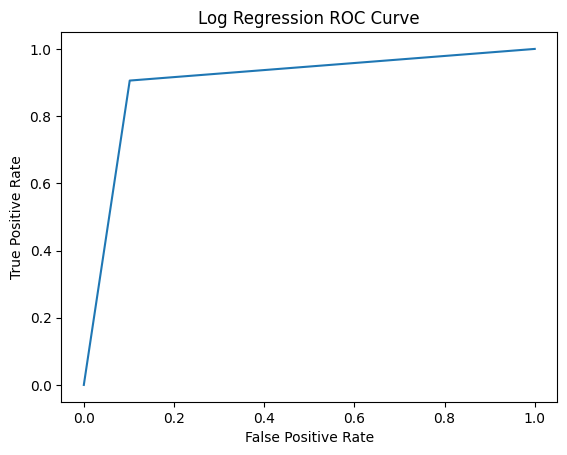

In [30]:
plt.plot(fpr_lr, tpr_lr)

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Log Regression ROC Curve')

Text(0.5, 1.0, 'Ridge Regression ROC Curve')

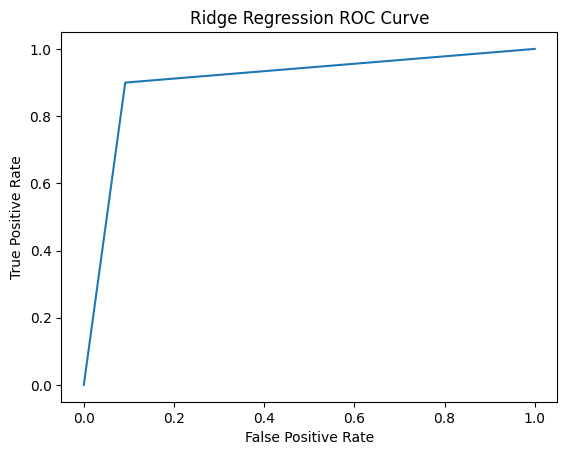

In [31]:
plt.plot(fpr_rr, tpr_rr)

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Ridge Regression ROC Curve')

In [32]:
# not sure how to decide between lr and rr here - rr has higher fpr and higher tpr at the elbow

## Log-Loss score
**What is the Log-Loss score? How do you interpret it?**
> *The Log-Loss score refers to how close the predicted probability is to the actual value. A lower log-loss score indicates lower divergence between the predicted probability and the actual value.

* import **log_loss** from sklearn

In [33]:
from sklearn.metrics import log_loss

* compute log_loss

In [34]:
ll_lr = log_loss(y, y_lr)
ll_rr = log_loss(y, y_rr)

* print log_loss

In [35]:
print(ll_lr)
print(ll_rr)

3.384840866170187
3.315759315393215


In [48]:
if ll_lr < ll_rr:
    print('Logistic regression is a better model.')
else:
    print('Ridge regression is a better model.')

Ridge regression is a better model.


#### Q: According to metrics above, which one is the better model?

In [49]:
# not sure?? the different metrics give different answers

# For the regression evaluation: linear regression is a better model
# For the classification evaluation: Precision and log-loss suggest ridge regression is a better model; Recall suggests logistic regression is a better model